# 정보추출 실습

---

## HTTP

## robots.txt
- 어떤걸 허가했고 어떤걸 금지 했는지(검색 시 크롤링을 해도 되는 지 여부)
- /robots.txt 하면 된다

In [2]:
import builtwith # 해당 웹페이지가 어떤 것을 쓰는지 알려줌

In [4]:
builtwith.parse("https://www.google.com")

{'web-servers': ['Google Web Server']}

In [6]:
builtwith.parse("http://www.wordpress.com")

{'web-servers': ['Nginx'],
 'font-scripts': ['Google Font API'],
 'ecommerce': ['WooCommerce'],
 'cms': ['WordPress'],
 'programming-languages': ['PHP'],
 'blogs': ['PHP', 'WordPress']}

In [7]:
builtwith.parse("http://www.daum.net")

{}

In [14]:
from whois import whois
whois('naver.com')



{'domain_name': ['NAVER.COM', 'naver.com'],
 'registrar': 'Gabia, Inc.',
 'whois_server': 'whois.gabia.com',
 'referral_url': None,
 'updated_date': [datetime.datetime(2016, 8, 5, 6, 37, 57),
  datetime.datetime(2018, 2, 28, 11, 27, 15)],
 'creation_date': [datetime.datetime(1997, 9, 12, 4, 0),
  datetime.datetime(1997, 9, 12, 0, 0)],
 'expiration_date': [datetime.datetime(2023, 9, 11, 4, 0),
  datetime.datetime(2023, 9, 11, 0, 0)],
 'name_servers': ['NS1.NAVER.COM',
  'NS2.NAVER.COM',
  'ns1.naver.com',
  'ns2.naver.com'],
 'status': ['clientDeleteProhibited https://icann.org/epp#clientDeleteProhibited',
  'clientTransferProhibited https://icann.org/epp#clientTransferProhibited',
  'clientUpdateProhibited https://icann.org/epp#clientUpdateProhibited',
  'ok https://icann.org/epp#ok'],
 'emails': ['white.4818@navercorp.com',
  'dl_ssl@navercorp.com',
  'abuse@gabia.com'],
 'dnssec': 'unsigned',
 'name': 'NAVER Corp.',
 'org': 'NAVER Corp.',
 'address': '6 Buljung-ro, Bundang-gu, Seongn

In [3]:
from urllib.request import urlopen

In [8]:
req = urlopen("http://python.org")

In [9]:
req.read().decode("utf-8")

'<!doctype html>\n<!--[if lt IE 7]>   <html class="no-js ie6 lt-ie7 lt-ie8 lt-ie9">   <![endif]-->\n<!--[if IE 7]>      <html class="no-js ie7 lt-ie8 lt-ie9">          <![endif]-->\n<!--[if IE 8]>      <html class="no-js ie8 lt-ie9">                 <![endif]-->\n<!--[if gt IE 8]><!--><html class="no-js" lang="en" dir="ltr">  <!--<![endif]-->\n\n<head>\n    <meta charset="utf-8">\n    <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <link rel="prefetch" href="//ajax.googleapis.com/ajax/libs/jquery/1.8.2/jquery.min.js">\n\n    <meta name="application-name" content="Python.org">\n    <meta name="msapplication-tooltip" content="The official home of the Python Programming Language">\n    <meta name="apple-mobile-web-app-title" content="Python.org">\n    <meta name="apple-mobile-web-app-capable" content="yes">\n    <meta name="apple-mobile-web-app-status-bar-style" content="black">\n\n    <meta name="viewport" content="width=device-width, initial-scale=1.0">\n    <meta name="Han

## 403 forbidden
- robots.txt가 /search를 막았기 때문
- 뚫는 방법 : 검사 도구로 해당 URL의 header를 살펴보면, user-agent가 있는데 이 agent를 넘기면 속일 수 있음!

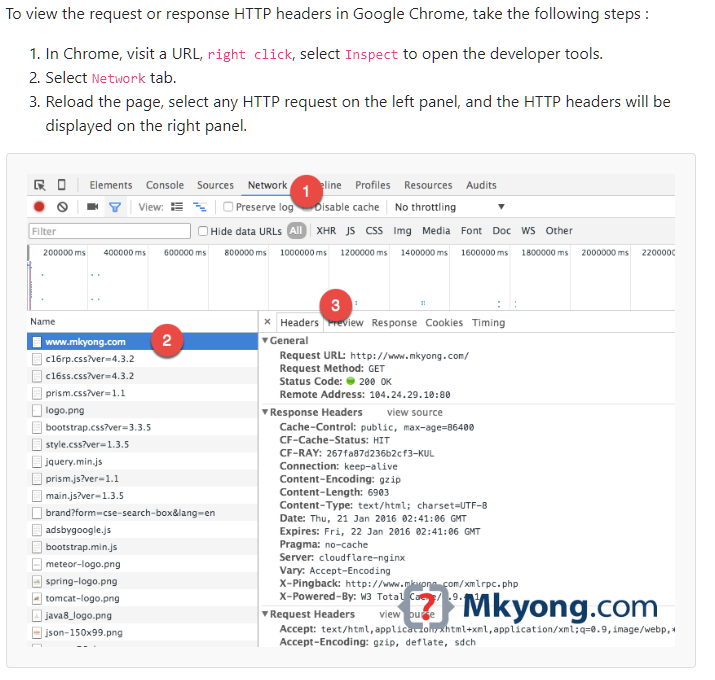

In [7]:
req = urlopen("https://www.google.com/search?ei=YRtMW-i3GZf1hwOWgZfYBw&q=python+whois&oq=python+whois&gs_l=psy-ab.3..35i39k1l2j0l2j0i203k1l6.1214.3520.0.3667.16.12.0.0.0.0.619.2283.0j7j1j1j0j1.10.0....0...1c.1.64.psy-ab..6.10.2279...0i67k1j0i13k1.0.CB9mgGfS99E")

HTTPError: HTTP Error 403: Forbidden

In [11]:
req = urlopen("http://www.naver.com")

## Error code
- 400대 : 내잘못
- 500대 : 쟤잘못(회선 문제나 서버의 문제)

In [126]:
from urllib.request import Request
from urllib.error import HTTPError

def download(url, agent='python bot', num_retries=2):
    headers = {"User-agent":agent}
    req = Request(url, headers=headers)
    try:
        res = urlopen(req)
    except HTTPError as e:
        res = None
        print(e.code, e.reason, e.headers)
        if 500 <= e.code < 600 and num_retries > 0:
            return download(url, num_retries=num_retries-1)
    return res
    

try:
    urlopen("https://search.naver.com/search.naver?where=nexearch&sm=top_hty&fbm=1&ie=utf8&query=%EA%B0%90%EC%9E%90")
except HTTPError as e:
    print(e.code, e.reason, e.headers)

403 Forbidden Date: Mon, 16 Jul 2018 06:35:52 GMT
Content-Type: text/html; charset=UTF-8
Transfer-Encoding: chunked
Connection: close
Vary: Accept-Encoding
Set-Cookie: page_uid=T0w8yspVuEKsssbzS0lssssss2Z-103436; path=/; domain=.naver.com
Set-Cookie: _naver_usersession_=0G807qB8t8krCPAWF7i25g==; path=/; expires=Mon, 16-Jul-18 06:40:52 GMT; domain=.naver.com
X-Frame-Options: SAMEORIGIN
X-XSS-Protection: 1; report=/p/er/post/xss
Cache-Control: no-cache, no-store, must-revalidate, max-age=0
Pragma: no-cache
Vary: Accept-Encoding




In [24]:
agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = download("https://search.naver.com/search.naver?ie=UTF-8&query=%EA%B0%90%EC%9E%90&sm=chr_hty", agent)

In [25]:
print(html)

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="감자 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'감자'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'감자'의 네이버 통합검색 결과입니다."> <title>감자 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https://ss

## requests module 사용 시 예제
- requests는 method에 get, post를 넣을 수 있다
- response는 object로 반환

In [52]:
import requests
from urllib import parse

def download(url, agent='python bot', num_retries=2):
    headers = {"User-agent":agent}
    res = requests.request("get", url, headers=headers) # 이 부분이 바뀐다
    
    
    if 500 <= res.status_code < 600 and num_retries > 0:
        print(res.status_code, res.reason)
        return download(url, num_retries=num_retries-1)
    return res
    

agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = download("https://search.naver.com/search.naver?ie=UTF-8&query="+parse.quote("감자")+"&sm=chr_hty", agent=agent)
print(html.text)
print(html.encoding)

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="감자 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'감자'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'감자'의 네이버 통합검색 결과입니다."> <title>감자 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_180712.css"> <link rel="stylesheet" type="text/css" href="https://ss

## urllib 한글
- parsing : 
- quoting : special character로 한글 변환 후 주소를 byte로 넘김(hexa-byte)

In [51]:
parse.quote("한글")

'%ED%95%9C%EA%B8%80'

In [53]:
params = {
    "where" : "nextsearch",
    "sm" : "top_hty",
    "fbm" : 1,
    "ie" : "utf8",
    "query" : "%ED%95%9C%EA%B8%80"
}


In [61]:
import json

jsonParams = json.dumps(params)


In [62]:
import requests
from urllib import parse
def downloadJson(url, agent='python bot', num_retries=2):
    headers = {"User-agent":agent}
    res = requests.request("post", url, headers=headers, json=jsonParams) # 이 부분이 바뀐다
    
    
    if 500 <= res.status_code < 600 and num_retries > 0:
        print(res.status_code, res.reason)
        return download(url, num_retries=num_retries-1)
    return res
    

In [67]:
html = downloadJson("http://httpbin.org/post")

In [68]:
html.text

'{"args":{},"data":"\\"{\\\\\\"where\\\\\\": \\\\\\"nextsearch\\\\\\", \\\\\\"sm\\\\\\": \\\\\\"top_hty\\\\\\", \\\\\\"fbm\\\\\\": 1, \\\\\\"ie\\\\\\": \\\\\\"utf8\\\\\\", \\\\\\"query\\\\\\": \\\\\\"%ED%95%9C%EA%B8%80\\\\\\"}\\"","files":{},"form":{},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Content-Length":"115","Content-Type":"application/json","Host":"httpbin.org","User-Agent":"python bot"},"json":"{\\"where\\": \\"nextsearch\\", \\"sm\\": \\"top_hty\\", \\"fbm\\": 1, \\"ie\\": \\"utf8\\", \\"query\\": \\"%ED%95%9C%EA%B8%80\\"}","origin":"163.152.3.137","url":"http://httpbin.org/post"}\n'

## get 방식은?
- param을 알아서 변환해 준다
- url을 그냥 param을 제외하고 넣어주면 된다

In [77]:
import requests
from urllib import parse
def downloadJsonGet(url, agent='python bot', num_retries=2):
    headers = {"User-agent":agent}
    res = requests.get(url, headers=headers, params = params) # 이 부분이 바뀐다
    
    
    if 500 <= res.status_code < 600 and num_retries > 0:
        print(res.status_code, res.reason)
        return download(url, num_retries=num_retries-1)
    return res
    

In [75]:
html = downloadJsonGet("http://httpbin.org/get")

In [76]:
html.text

'{"args":{"fbm":"1","ie":"utf8","query":"%ED%95%9C%EA%B8%80","sm":"top_hty","where":"nextsearch"},"headers":{"Accept":"*/*","Accept-Encoding":"gzip, deflate","Connection":"close","Host":"httpbin.org","User-Agent":"python bot"},"origin":"163.152.3.137","url":"http://httpbin.org/get?where=nextsearch&sm=top_hty&fbm=1&ie=utf8&query=%25ED%2595%259C%25EA%25B8%2580"}\n'

In [78]:
import requests
from urllib import parse
def download(url, agent='python bot', num_retries=2):
    headers = {"User-agent":agent}
    res = requests.get(url, headers=headers, params=params) # 이 부분이 바뀐다
    
    
    if 500 <= res.status_code < 600 and num_retries > 0:
        print(res.status_code, res.reason)
        return download(url, num_retries=num_retries-1)
    return res
    

agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = download("https://search.naver.com/search.naver", agent=agent)
print(html.text)
print(html.encoding)

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="%ED%95%9C%EA%B8%80 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'%ED%95%9C%EA%B8%80'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'%ED%95%9C%EA%B8%80'의 네이버 통합검색 결과입니다."> <title>%ED%95%9C%EA%B8%80 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_1807

## GET VS POST
- GET : 간단하게 불러올 때 사용, 주소 뒤에 데이터가 그대로 노출됨
- POST : 많은 데이터를 불러올 때 사용, 주소 뒤에 데이터가 노출되지 않음

## Web Crawling
- 시스템적으로 web을 돌아다니며 수집
- web indexing이 목적
- 반복하여 찾고, hyperlink를 fetch 한 후, indexing

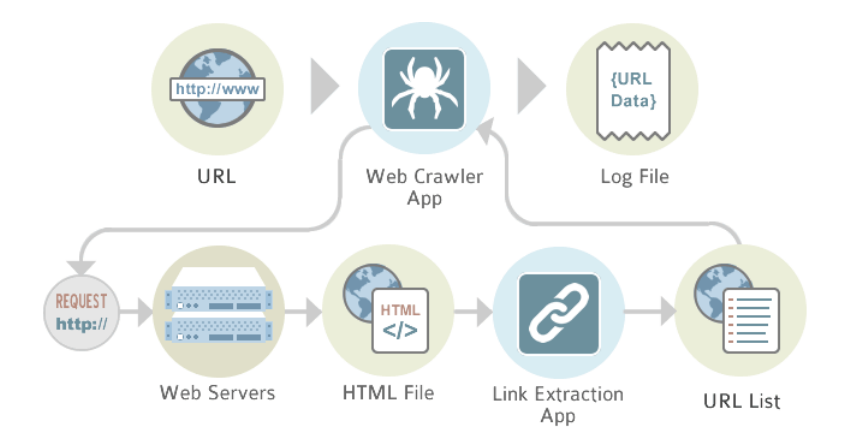

## Scrapy VS BeautifulSoup
- Scrapy : web-spider
- BeautifulSoup : parsing library

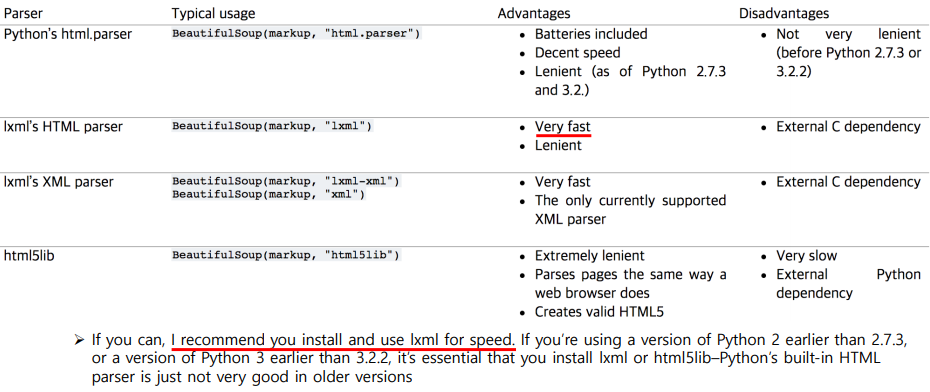

In [81]:
from bs4 import BeautifulSoup

In [82]:
html = """
    <html>
        <head></head>
        <body>
            <div id = "wrap">
                <p class = "content">
                    <a href = "#">link</a>
                </p>
            </div>
        </body>
    </html>
"""

In [86]:
doc = BeautifulSoup(html, "lxml")

In [91]:
print(doc.div["id"])
print(doc.p["class"])
print(doc.a["href"])
print(doc.a.attrs)

wrap
['content']
#
{'href': '#'}


## 내부주소 VS 외부주소
- 두 개를 구별해야 크롤러로 기능을 제대로 함
- 내부 주소는 원래 url과 합치는 그것...?

In [94]:
import requests
from urllib import parse
def download(url, agent='python bot', num_retries=2):
    headers = {"User-agent":agent}
    res = requests.get(url, headers=headers, params=params) # 이 부분이 바뀐다
    
    
    if 500 <= res.status_code < 600 and num_retries > 0:
        print(res.status_code, res.reason)
        return download(url, num_retries=num_retries-1)
    return res
    

agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
html = download("https://search.naver.com/search.naver", agent=agent)
print(html.text)
print(html.encoding)

<!doctype html> <html lang="ko"> <head> <meta charset="utf-8"> <meta name="referrer" content="always">  <meta name="format-detection" content="telephone=no,address=no,email=no"> <meta name="viewport" content="width=device-width,initial-scale=1.0,maximum-scale=2.0"> <meta property="og:title" content="%ED%95%9C%EA%B8%80 : 네이버 통합검색"/> <meta property="og:image" content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png"> <meta property="og:description" content="'%ED%95%9C%EA%B8%80'의 네이버 통합검색 결과입니다."> <meta name="description" lang="ko" content="'%ED%95%9C%EA%B8%80'의 네이버 통합검색 결과입니다."> <title>%ED%95%9C%EA%B8%80 : 네이버 통합검색</title> <link rel="shortcut icon" href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_140327.ico">  <link rel="search" type="application/opensearchdescription+xml" href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" title="Naver" /><link rel="stylesheet" type="text/css" href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_1807

In [97]:
doc = BeautifulSoup(html.text, "lxml")

In [98]:
doc.find("a")

<a href="#lnb"><span>메뉴 영역으로 바로가기</span></a>

In [100]:
aList = doc.find_all("a")

In [101]:
len(aList)

382

In [106]:
for row in aList:
    print(type(row), row.attrs["href"])

<class 'bs4.element.Tag'> #lnb
<class 'bs4.element.Tag'> #content
<class 'bs4.element.Tag'> http://www.naver.com
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_16.naver
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> #
<class 'bs4.element.Tag'> https://nid.naver.com/nidlogin.login?url=https%3A%2F%2Fsearch.naver.com%2Fsearch.naver%3Fwhere%3Dnextsearch%26sm%3Dtop_hty%26fbm%3D1%26ie%3Dutf8%26query%3D%2525ED%252595%25259C%2525EA%2525B8%252580
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_16.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_21.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_17.naver
<class 'bs4.element.Tag'> https://help.naver.com/support/alias/search/word/word_18.naver
<class 'bs4.element.Tag'> javascript:;
<class 'bs4.element.Tag'> javascript:;
<class 'bs4.element.Tag'> ht

In [144]:
params = {
    "query" : "%ED%95%9C%EA%B8%80"
}
    

agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"

url = "https://m.ppomppu.co.kr/new/bbs_list.php?id=freeboard"
html = download(url, agent=agent)


In [145]:
html = html.read()
html1 = html.decode("euc-kr")
html2 = html1.encode("utf-8").decode("utf-8")
html

b'<!doctype html>\n<html lang="ko">\n<head>\n<meta http-equiv="Content-Type" content="text/html; charset=euc-kr" />\n<meta name="viewport" content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" />\n<meta property="og:site_name" content="\xbb\xcb\xbb\xd1" />\n<meta property="og:description" content="" />\n\n<title>\xbb\xcb\xbb\xd1:\xc0\xda\xc0\xaf\xb0\xd4\xbd\xc3\xc6\xc7</title>\n<link rel="shortcut icon" href="//img.ppomppu.co.kr/images/nn128.jpeg?v=2018071018" />\n<link rel="apple-touch-icon" href="//img.ppomppu.co.kr/images/nn128.jpeg?v=2018071018" />\n\t<link rel="stylesheet" type="text/css" href="/new/css/mobile.css?v=2018071018" />\n\n\n<link href="/new/asset/css/list_popup.css?v=2016081616" rel="stylesheet" type="text/css"/>\n<script>\nvar G_HOME_URL    = "http://m.ppomppu.co.kr";\nvar G_WWW_URL     = "http://www.ppomppu.co.kr";\nvar G_WWW_REL_URL = "//www.ppomppu.co.kr";\nvar G_MOB_URL     = "http://m.ppomppu.co.kr";\nvar G_MOB_RE

In [146]:
text1 = BeautifulSoup(html, "lxml") # 제대로 나옴(알아서 encoding, decoding 해줌)

In [147]:
text1.contents

['html', <html lang="ko">
 <head>
 <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
 <meta content="width=device-width, initial-scale=1.0, maximum-scale=1.0, minimum-scale=1.0, user-scalable=no" name="viewport"/>
 <meta content="뽐뿌" property="og:site_name"/>
 <meta content="" property="og:description"/>
 <title>뽐뿌:자유게시판</title>
 <link href="//img.ppomppu.co.kr/images/nn128.jpeg?v=2018071018" rel="shortcut icon"/>
 <link href="//img.ppomppu.co.kr/images/nn128.jpeg?v=2018071018" rel="apple-touch-icon"/>
 <link href="/new/css/mobile.css?v=2018071018" rel="stylesheet" type="text/css"/>
 <link href="/new/asset/css/list_popup.css?v=2016081616" rel="stylesheet" type="text/css"/>
 <script>
 var G_HOME_URL    = "http://m.ppomppu.co.kr";
 var G_WWW_URL     = "http://www.ppomppu.co.kr";
 var G_WWW_REL_URL = "//www.ppomppu.co.kr";
 var G_MOB_URL     = "http://m.ppomppu.co.kr";
 var G_MOB_REL_URL = "//m.ppomppu.co.kr";
 var G_NIC_URL     = "//nic.ppomppu.co.kr";
 var G_MEMO_URL 

In [148]:
text1.a

<a href="http://m.ppomppu.co.kr/new/index.php"><img alt="뽐뿌" src="/new/asset/images/common/logo_2.png" style="width:122px; height:25px;"/></a>

In [149]:
aList = text1.find_all("a")

In [150]:
for row in aList:
    print(row.attrs)

{'href': 'http://m.ppomppu.co.kr/new/index.php'}
{'href': '#전체메뉴', 'onclick': "clickButton('1');", 'id': 'menuBtn'}
{'href': '#search', 'onclick': "clickButton('2');", 'id': 'searchBtn'}
{'href': 'http://m.ppomppu.co.kr/new/search_result.php?search_type=sub_memo&keyword=%C5%B8%C4%AB%C7%CF%C5%B8+%B9%CC%C3%F7%C5%B0'}
{'href': 'http://m.ppomppu.co.kr/new/search_result.php?search_type=sub_memo&keyword=%BA%F1%C0%CE%B5%CE%BE%CF'}
{'href': 'http://m.ppomppu.co.kr/new/search_result.php?search_type=sub_memo&keyword=%B1%E8%BF%EC%BA%F3'}
{'href': 'http://m.ppomppu.co.kr/new/search_result.php?search_type=sub_memo&keyword=%C8%B2%C0%C7%C1%B6'}
{'href': 'http://m.ppomppu.co.kr/new/search_result.php?search_type=sub_memo&keyword=%C7%D1%B1%B9%C1%B6%C6%F3%B0%F8%BB%E7+%BC%EE%C7%CE%B8%F4'}
{'href': 'http://m.ppomppu.co.kr/new/search_result.php?search_type=sub_memo&keyword=%C1%A4%BE%E7'}
{'href': 'http://m.ppomppu.co.kr/new/search_result.php?search_type=sub_memo&keyword=%BF%C1%B7%F9%B0%FC+%BC%AD%BF%EF1%C8%A

## Scraping 예제

In [161]:
import requests
from bs4 import BeautifulSoup as bs

html = requests.get("http://www.pythonscraping.com/pages/warandpeace.html")
doc = bs(html.text, 'lxml')

div = doc.find("div", id="text")
print(div.get_text())

tagList = doc.find_all("span", class_="green")
print(len(tagList))

for tag in tagList:
    print(tag.get_text())
    
tagList = doc.find_all("span", {"class":"green"})
print(len(tagList))

for tag in tagList:
    print(tag.get_text())
    
    


"Well, Prince, so Genoa and Lucca are now just family estates of the
Buonapartes. But I warn you, if you don't tell me that this means war,
if you still try to defend the infamies and horrors perpetrated by
that Antichrist- I really believe he is Antichrist- I will have
nothing more to do with you and you are no longer my friend, no longer
my 'faithful slave,' as you call yourself! But how do you do? I see
I have frightened you- sit down and tell me all the news."

It was in July, 1805, and the speaker was the well-known Anna
Pavlovna Scherer, maid of honor and favorite of the Empress Marya
Fedorovna. With these words she greeted Prince Vasili Kuragin, a man
of high rank and importance, who was the first to arrive at her
reception. Anna Pavlovna had had a cough for some days. She was, as
she said, suffering from la grippe; grippe being then a new word in
St. Petersburg, used only by the elite.

All her invitations without exception, written in French, and
delivered by a scarlet-liveri

In [164]:
import requests
from bs4 import BeautifulSoup as bs

html = requests.get("http://www.pythonscraping.com/pages/page3.html")
doc = bs(html.text, "lxml")
div1 = doc.div
print(type(div1))

div2 = doc.find_all("div")
print(type(div2))

for tag in div2:
    print(type(tag))

<class 'bs4.element.Tag'>
<class 'bs4.element.ResultSet'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>
<class 'bs4.element.Tag'>


## 180717

---

In [180]:
import requests
from bs4 import BeautifulSoup

In [241]:
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36"
}

params = {
    "q" : "한글"
}

url = "https://www.google.com/search"

In [187]:
html = requests.get(url, params=params, headers=headers)

In [188]:
html.encoding

'UTF-8'

'<!doctype html><html itemscope="" itemtype="http://schema.org/SearchResultsPage" lang="ko"><head><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><link href="/images/branding/product/ico/googleg_lodp.ico" rel="shortcut icon"><meta content="origin" name="referrer"><title>한글 - Google 검색</title><script nonce="5mcmMkJvtmRGivxvGwl+Aw==">(function(){window.google={kEI:\'g0VNW-zBGMSuoASGxqfIDA\',kEXPI:\'31\',authuser:0,kscs:\'c9c918f0_g0VNW-zBGMSuoASGxqfIDA\',kGL:\'KR\'};google.kHL=\'ko\';})();google.time=function(){return(new Date).getTime()};google.timers={};google.startTick=function(c,b){var a=b&&google.timers[b].t?google.timers[b].t.start:google.time();google.timers[c]={t:{start:a},e:{},m:{}};(a=window.performance)&&a.now&&(google.timers[c].wsrt=Math.floor(a.now()))};google.startTick("webaft");google.startTick("load");</script><!--srt--><script nonce="5mcmMkJvtmRGivxvGwl+Aw==">(function(){google.lc=[];google.li=0;google.getEI=function(a){for(v
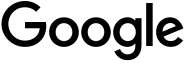
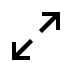
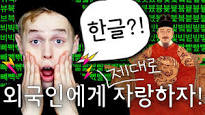
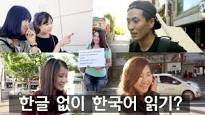
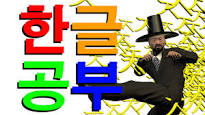
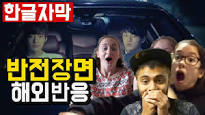
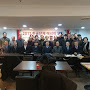
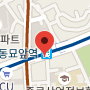
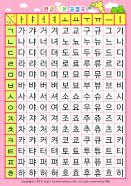
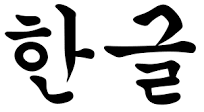
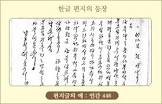
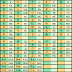
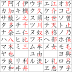
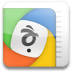

In [189]:
html.text

In [190]:
dom = BeautifulSoup(html.text, 'lxml')

[<a href="/search?q=%ED%95%9C%EA%B8%80&amp;gbv=1&amp;sei=g0VNW-zBGMSuoASGxqfIDA">여기</a>,
 <a aria-expanded="false" class="gb_b gb_dc" data-ogsr-alt="" href="https://www.google.co.kr/intl/ko/options/" role="button" tabindex="0" title="Google 앱"></a>,
 <a class="gb_5f gb_Aa gb_Eb" href="https://accounts.google.com/ServiceLogin?hl=ko&amp;passive=true&amp;continue=https://www.google.com/search%3Fq%3D%25ED%2595%259C%25EA%25B8%2580" id="gb_70" target="_top">로그인</a>,
 <a data-hveid="3" href="https://www.google.com/webhp?hl=ko&amp;sa=X&amp;ved=0ahUKEwisj8GP_aTcAhVEF4gKHQbjCckQPAgD" id="logo" title="Google 홈페이지로 이동"><img alt="Google" height="44" src="/images/branding/googlelogo/2x/googlelogo_color_120x44dp.png" width="120"/></a>,
 <a href="//support.google.com/websearch/answer/186645?hl=ko">자세히 알아보기</a>,
 <a class="duf3 aciXEb" data-async-trigger="duf3-46" data-ved="0ahUKEwisj8GP_aTcAhVEF4gKHQbjCckQtw8IBQ" href="#" id="sbfblt" jsaction="async.u">부적절한 예상 검색어 신고</a>,
 <a class="q qs" href="/searc
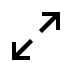

In [191]:
dom.select("a")

In [197]:
aList = dom.select("div.rc > h3.r > a")

In [199]:
for row in aList:
    print(row["href"])

http://www.hancom.com/downLoad.downPU.do
https://www.hancom.com/product/productWindowsMain.do
https://namu.wiki/w/%ED%95%9C%EA%B8%80
https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80
https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8
https://www.korean.go.kr/hangeul/principle/001.html
https://www1.president.go.kr/petitions/154276
http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y
https://www.microsoft.com/ko-kr/download/details.aspx?id=36772


In [336]:
def getUrl(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code<600 and num_retries>0:
        print(html.status_code, html, reason)
        return getUrl(url=url, params=params, mum_retires = (num_retries-1))
    dom = BeautifulSoup(html.content, 'lxml')
    links = dom.select(select)
    
    return [link.get("href") for link in links if link.has_attr("href") == True]

In [ ]:
links = getUrl(url, params)

In [205]:
links

['http://www.hancom.com/downLoad.downPU.do',
 'https://www.hancom.com/product/productWindowsMain.do',
 'https://namu.wiki/w/%ED%95%9C%EA%B8%80',
 'https://ko.wikipedia.org/wiki/%ED%95%9C%EA%B8%80',
 'https://ko.wikibooks.org/wiki/%ED%95%9C%EA%B5%AD%EC%96%B4_%EC%9E%85%EB%AC%B8/%ED%95%9C%EA%B8%80_%EC%9E%90%EB%AA%A8',
 'https://www.korean.go.kr/hangeul/principle/001.html',
 'https://www1.president.go.kr/petitions/154276',
 'http://www.kocca.kr/cop/bbs/view/B0000137/1833364.do?menuNo=200827&noticevent=Y',
 'https://www.microsoft.com/ko-kr/download/details.aspx?id=36772']

In [285]:
seed = "https://www.google.com/search"
select = "div.rc > h3.r > a"
queue = getUrl(seed, params, select)
result = []

In [287]:
while queue:
    url = queue.pop()
    
    urlList = getUrl(url)
    result.append(url)
    result.extend(urlList)
    
    print(url, len(urlList), end="\n\n")

['https://www.microsoft.com/ko-kr/download/details.aspx?id=36772', 'http://support.microsoft.com/gp/howtoscript', '#skipToMain', 'https://www.microsoft.com', 'https://products.office.com/ko-kr/home', 'https://www.microsoft.com/ko-kr/windows/', 'https://www.microsoft.com/ko-kr/surface', 'https://www.xbox.com/', 'https://support.microsoft.com/ko-kr', 'https://www.microsoft.com/ko-kr/windows/windows-10-apps', 'https://onedrive.live.com/about/ko-kr/', 'https://outlook.live.com/owa/', 'https://www.skype.com/ko/', 'https://www.onenote.com/?omkt=ko-KR', 'https://www.microsoft.com/ko-kr/windows/devices', 'https://www.microsoft.com/accessories/ko-kr', 'https://www.xbox.com/ko-kr/games/xbox-one?xr=shellnav', 'https://www.microsoft.com/ko-kr/windows/windows-10-games', 'https://www.microsoft.com/ko-kr/store/games/windows?icid=TopNavWindowsGames', 'https://azure.microsoft.com/ko-kr/', 'https://www.microsoft.com/ko-kr/dynamics365/home', 'https://www.microsoft.com/microsoft-365/?omkt=ko-KR', 'https:/

In [266]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php?id=freeboard&page"
select = "div.rc > h3.r > a"
queue = [seed]

In [269]:
html = requests.get(seed, params=params, headers=headers)

In [270]:
html.content.decode("utf-8") # 안되는게 맞음

UnicodeDecodeError: 'utf-8' codec can't decode byte 0x8b in position 1: invalid start byte

In [272]:
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding" : "false"

}

params = {
    "q" : "한글"
}

url = "https://www.google.com/search"

In [274]:
html = requests.get(seed, params=params, headers=headers) # 헤더 추가로 작동함

## 예제 : 뽐뿌게시판 스크래핑 

In [396]:
seed = "http://www.ppomppu.co.kr/zboard/zboard.php"
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding" : "false"

}

params = {
    "id" : "freeboard",
    "page" : "1"
}

In [400]:
def getUrl(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code<600 and num_retries>0:
        print(html.status_code, html, reason)
        return getUrl(url=url, params=params, mum_retires = (num_retries-1))
    dom = BeautifulSoup(html.content, 'lxml')
    links = dom.select(select)
    
    return [link.get("href") for link in links if link.has_attr("href") == True]

In [401]:
urlList = getUrl(url=seed, params = params, select="td.list_vspace > img + a")

In [402]:
for row in urlList[1:]:
    print(row)

view.php?id=freeboard&page=1&divpage=1111&no=5951951
view.php?id=freeboard&page=1&divpage=1111&no=5951950
view.php?id=freeboard&page=1&divpage=1111&no=5951949
view.php?id=freeboard&page=1&divpage=1111&no=5951948
view.php?id=freeboard&page=1&divpage=1111&no=5951947
view.php?id=freeboard&page=1&divpage=1111&no=5951946
view.php?id=freeboard&page=1&divpage=1111&no=5951945
view.php?id=freeboard&page=1&divpage=1111&no=5951944
view.php?id=freeboard&page=1&divpage=1111&no=5951943
view.php?id=freeboard&page=1&divpage=1111&no=5951942
view.php?id=freeboard&page=1&divpage=1111&no=5951941
view.php?id=freeboard&page=1&divpage=1111&no=5951940
view.php?id=freeboard&page=1&divpage=1111&no=5951939
view.php?id=freeboard&page=1&divpage=1111&no=5951938
view.php?id=freeboard&page=1&divpage=1111&no=5951937
view.php?id=freeboard&page=1&divpage=1111&no=5951936
view.php?id=freeboard&page=1&divpage=1111&no=5951935
view.php?id=freeboard&page=1&divpage=1111&no=5951934
view.php?id=freeboard&page=1&divpage=1111&no=5

## Crawling VS Scraping

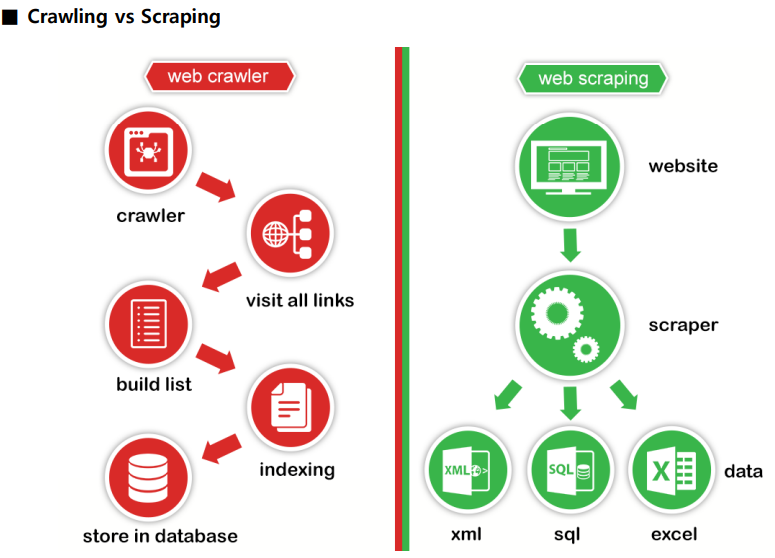

## Crawling 알고리즘 기본

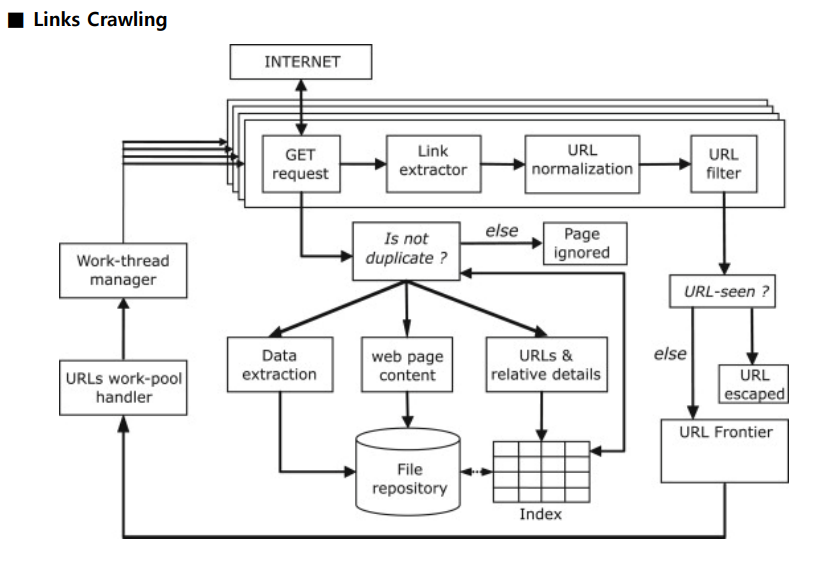

## Page Rank Algorithm
- 구글이 초기에 썼던 검색 알고리즘

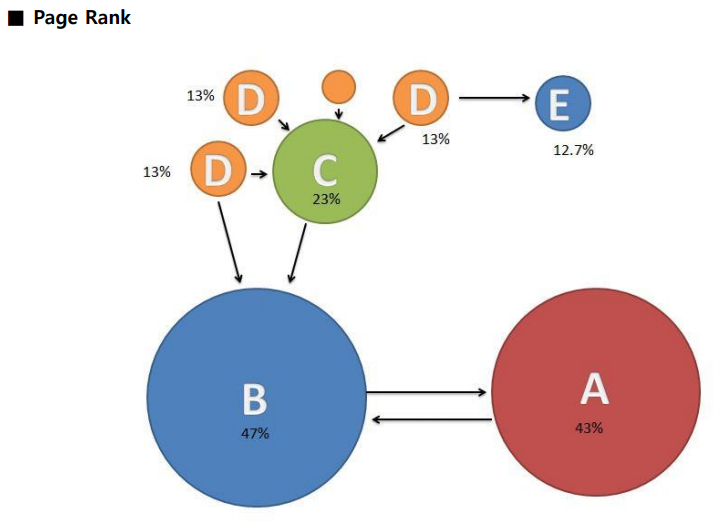

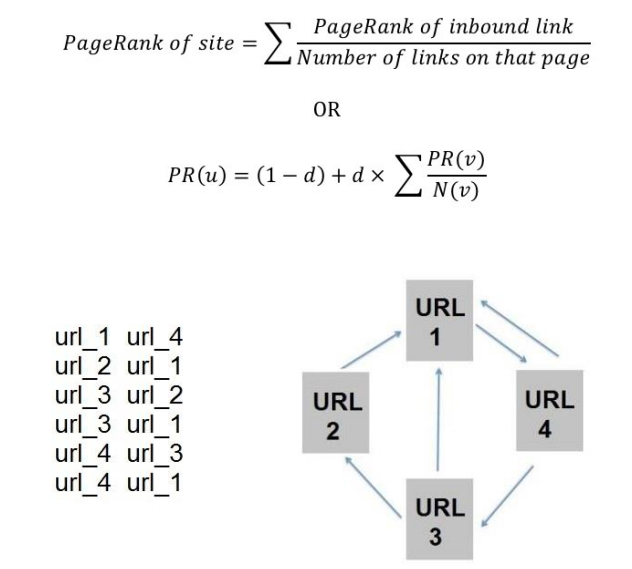

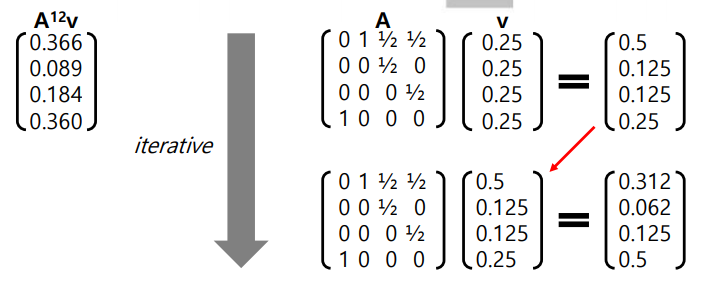

## Scraping

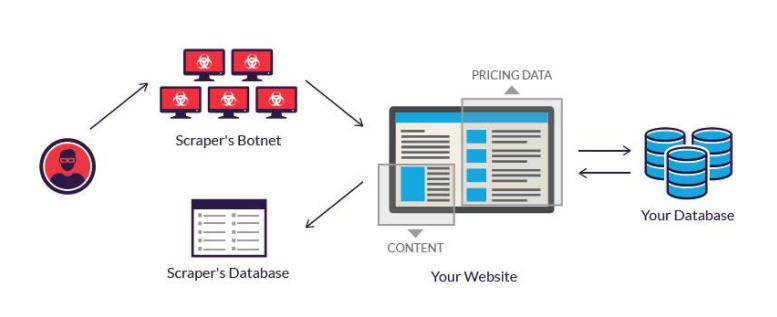

In [405]:
def getContent(url, params, select = "a"):
    res = requests.get(url, params = params, headers=headers)
         
    if 500 <= html.status_code<600 and num_retries>0:
        print(html.status_code, res, reason)
        return getUrl(url=url, params = params, mum_retires = (num_retries-1))
    dom = BeautifulSoup(res.content, 'html.parser')
    links = dom.select(select)
    
    return links


In [409]:
seed = "http://www.ppomppu.co.kr/zboard/"
params = {
    "id":"freeboard",
    "page":"1",
    "prev_page":None,
    "divpage":"1109"
}

for url in urlList:
    title = getContent(seed+url, params, ".view_title2")
    content = getContent(seed+url, params, "table.pic_bg table td.han")
    print(title[0].get_text())
    print(content[0].get_text().strip())

배슬기 복고댄스 #1
이쁘죠?
커피에 메로나를 통째로 녹여먹었는데 맛있네요
텀블러에 카누 +  뜨거운물 200ml 넣고  
 
메로나를 넣고 몇번 휘저으니깐 다 녹아서 먹고있는데
 
생각보다 맛있네요
한달 맞은 갓재명 경기도통령 인수위.. 주민 간담회 등 '소통' 주력
한달 맞은 이재명 인수위.. 주민 간담회 등 '소통' 주력










CBS노컷뉴스 동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규동규 기자





http://v.media.daum.net/v/20180717134203438
개인사업을 하는데 요즘 진짜 경기 안 좋네요 ㅜㅜ
소비심리가 많이 위축됐다는 뉴스는 많이 보셨을 겁니다.
개인사업을 하다보니 피부로 팍팍 느끼고 있습니다.
다른 나라들은 완전 고용이네 뭐네 하면서 경기가 좋은듯한데 우리나라는 겨울이네요.
직장인 여러분, 사장님들 모두 끝까지 잘 버텨냅시다!
볼때마다 떠오르는 혜경궁 김씨 수사한지가 언젠대.
왜 아직도 발표가 없죠.
 
수사 한지가 언젠데...
 
한달 넘게 걸릴 일이 아닐텐데
 
뭐지
 
왜이리 발표가 늦을까요.
여부사관 성추행 사건 보이 우리 부대 여부사관 생각나네요
전입온지 얼마 안됐을 때 간부들끼리 회식하고 노래방엘 갔는데 거기서 그 여부사관이 노래도 잘 부르고 탬버린을 좀 잘 가지고 놀았나봐요

그 뒤로 그 여부사관은 술집에서 일하다 인생 세탁하고 군인이 된 술집여자가 됐어요

중사 이상 부사관 놈들이 병사들한테 대놓고 그렇게 말하고 다녔죠

우리한테 그렇게 말하고 다녔을 정도니 실제 대우는 뭐..

부대 내에 술 먹는 행사 때나 휴양소 같은데서

최영애 "文, 페미니스트 대통령 공약 지켜야"→靑 여권 '수장' 낙점
http://www.greened.kr/news/articleView.html?idxno=68660
 
 
http://www.dtoday.co.kr/news/articleView.html?idxno=272251
 
 

최영애 위원장은 특히 여성 인권 신장을 위한 투쟁의 일선에 서 온 바 있다. 그는 지난 4월 SBSCNBC '제정임의 문담쇼, 힘'에 출연해 "펜스룰을 주장하는 이들은 사건의 원인을 여성으로 본다"면서 "여성을 치워버리자는 펜스룰에 반대한다"라고 소신을 드러냈다. 또한 문재인 대통령에 대해서는 "인권·페미니스트 대통령이 되겠다고 한 공약을 실천해야 한다"라고 강조한 바 있다.

 
 
http://www.slist.kr/news/articleView.html?idxno=39638#09Pr
 
 
 

문 대통령이 국가인권위원장에 여성 인권에 관심을 기울인 여성 인사를 지명한 것은 여성 인권에 보다 각별한 관심을 갖겠다는 신호로 읽힌다. 여성 장관을 30% 비율로 맞추겠다는 대선 공약을 이어나가는 차원으로도 보인다.

.
.
.
깝깝하네요.  아직 시작도 안한거 같아서  더 깝깝하고 답답합니다.
LNG   가스보일러,    경동   vs  린나이
아파트 전체 가스가 LNG 로 전환됩니다.
 
동대표 회의 공지로는  경동과 린나이 둘 중에 선택할 수 있다고 하네요.   둘다 공동구매로요. 
 
가격은 잘모르겠지만 50-60 정도가 되지않을까 합니다.  
 
두 회사 제품 모두 평이 괜찮은 편인 것 같던데,  어떤게 나을지 모르겠네요.
 
지금 쓰고 있는 건 린나이 제품입니다.  거의 18-19년 정도 된 것 같네요.  
 
오래된 이유로 연비는 별로 안좋은듯 싶어서 이번에 새 보일러로 교체하려고 합니다.
 
잘 아시는 분 계신지요. 
 
설문도 한번 올려볼게요.
컬쳐사기가 한바탕지나갔나보네요
늦게봐서 속을기회도 없긴했지만 플친으로 사기치는건 또 첨봅니다
프사에 사진은 사라지고 

## 실습 : 뽐뿌 덧글 긁어오기

#### 게시판 페이지 본문 링크

In [482]:
# 게시판 페이지 본문 링크
seed = "http://www.ppomppu.co.kr/zboard/zboard.php"
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding" : "false"

}

params = {
    "id" : "freeboard",
    "page" : "1"
}

In [483]:
def getUrl(url, params=None, select="a", num_retries=2):
    html = requests.get(url, params=params, headers=headers)
    
    if 500 <= html.status_code<600 and num_retries>0:
        print(html.status_code, html, reason)
        return getUrl(url=url, params=params, mum_retires = (num_retries-1))
    dom = BeautifulSoup(html.content, 'lxml')
    links = dom.select(select)
    
    return [link.get("href") for link in links if link.has_attr("href") == True]

In [484]:
urlList = getUrl(url=seed, params = params, select="td.list_vspace > img + a")
print(urlList)

['view.php?id=regulation&page=1&divpage=202&no=6', 'view.php?id=freeboard&page=1&divpage=1111&no=5952103', 'view.php?id=freeboard&page=1&divpage=1111&no=5952102', 'view.php?id=freeboard&page=1&divpage=1111&no=5952101', 'view.php?id=freeboard&page=1&divpage=1111&no=5952100', 'view.php?id=freeboard&page=1&divpage=1111&no=5952099', 'view.php?id=freeboard&page=1&divpage=1111&no=5952098', 'view.php?id=freeboard&page=1&divpage=1111&no=5952097', 'view.php?id=freeboard&page=1&divpage=1111&no=5952096', 'view.php?id=freeboard&page=1&divpage=1111&no=5952095', 'view.php?id=freeboard&page=1&divpage=1111&no=5952094', 'view.php?id=freeboard&page=1&divpage=1111&no=5952093', 'view.php?id=freeboard&page=1&divpage=1111&no=5952092', 'view.php?id=freeboard&page=1&divpage=1111&no=5952091', 'view.php?id=freeboard&page=1&divpage=1111&no=5952090', 'view.php?id=freeboard&page=1&divpage=1111&no=5952089', 'view.php?id=freeboard&page=1&divpage=1111&no=5952088', 'view.php?id=freeboard&page=1&divpage=1111&no=5952087

#### 본문 내 댓글 가져오기

In [485]:
seed = "http://www.ppomppu.co.kr/zboard/"
headers = {
    "user-agent" : "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/67.0.3396.99 Safari/537.36",
    "accept-encoding" : "false"

}
params = {
    "id":"freeboard",
    "page":"1",
    "prev_page":None,
    "divpage":"1109"
}

In [486]:
def getComment(url, params, select = "a"):
    res = requests.get(url, params = params, headers=headers)
         
    if 500 <= html.status_code<600 and num_retries>0:
        print(html.status_code, res, reason)
        return getUrl(url=url, params = params, mum_retires = (num_retries-1))
    dom = BeautifulSoup(res.content, 'lxml')
    links = dom.select(select)
    
    return links


In [487]:
for url in urlList:
    comment_author = getComment(seed+url, params, "td.info_bg + td.separator2 + td + td > b > a")
    comment_content = getComment(seed+url, params, "div.han")
#     print(comment_author)
    if comment_content and comment_author:
        print("["+comment_author[0].get_text()+"]", end="\n")
        print(comment_content[0].get_text(), end="\n\n")


[caf2]
^^;

[맑은겨울하늘]
진심으로 너무 조금 오른거 아닌가요?;;

[칼엘]
한참 보고 갑니다. ㅎㅎ 플래시 댄스 ㄷㄷㄷ

[orange2nd]
sk가 하이닉스를 가지고 있어서 그렇게 된거지 엘지가 가지고 있었다고 해서 저런 이익을 냈을꺼라 볼수 없죠.

[tech-]
쏘가리용 미노우좀 사야하는디... 좋은걸 모르겠네요.

[september31]
'문명인은 야만인과 대화하지 않는다.'


미치겠다 ㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋㅋ

개고기 먹는 사람을 야만인이라고 비하하고,
개고기 반대하는 사람들은 문명인이라고 높이는 사람이 있다는게 놀라울 따름

[적절소년]
수사는 일식 뷔페라 일식 안 좋아하면 먹을게 없죠

[폰딧불이]
가능하다면 제가 넘겨받고 싶네요 ㅜ.ㅜ 안타깝습니다...

[]
안쓰는건 뚜껑 뽑고 방향제로..

[좋은행운]
ㅋㅋㅋㅋㅋ 사드때 하던짓 당하니깐 어떠냐 ㅋㅋㅋㅋ 시진핑은 진심 생긴것처럼 멍청한듯.... 트황상 늘 응원합니다.

[스트링버퍼]
치료가 끝나야 잔금을 치르는디 초장부터 완납이라니..ㄷ

[뽐맨히어로]
취냥인가여 ㄷㄷ

[뽐맨히어로]
입맛 없을땐 치킨이죠
테이크아웃 하는 치킨과 
콜라나 맥주랑

[쥐박이때려잡기]
용감하다는 표현을 sns관종에게 하지맙시다 ㅋㅋㅋ

[우엉우엉차]
수사 제일 처음에는 주방에서 광어 회떠서 초밥 만드는 모습도 볼 수 있었는데..요즘은 영..ㅠㅠ
이랜드쪽은 피자몰이 가성비가 좋은거같아요

[예비대머리]
가끔행사하니 그때를 노려보세요 ㅎ

[오다가다]
땅만 사놨어요....

[SatanShin]
오영주도 했겠죠 출연자들 다 함

[GTX880]
좋네요 추천 .....!!

[1000p]
걍 팔아요 ..

[감자먹고싶다아]
이득이 난다는게 신기할정도

[로건레이먼]
최소 2주 한달 간격으로 뽑아요

[너굴리얀]
본문엔 20대...

[HeavenShallBurn]
만약 된다면 편한 일하면서 아무한테도 말 안할거예요.
근데 로또를 안사네요.

[너굴리얀]
거 전화받은 사람 이름이 뭡니까?
가 오버랩되네요...

## 데이터의 종류?
- 정형(relational DB), 비정형(NoSQL), 반정형(xml)

In [488]:
%%writefile moon.txt
달
해
별

Writing moon.txt


In [490]:
!dir

 C 드라이브의 볼륨에는 이름이 없습니다.
 볼륨 일련 번호: BE68-3FE2

 C:\Users\태리미\Google 드라이브\공부\18년 후반기\데이터진흥원 디렉터리

2018-07-17  오후 06:00    <DIR>          .
2018-07-17  오후 06:00    <DIR>          ..
2018-07-16  오전 10:04    <DIR>          .git
2018-07-04  오후 02:40                47 .gitignore
2018-07-16  오전 11:07    <DIR>          .ipynb_checkpoints
2018-07-13  오전 10:17             1,303 css.html
2018-07-13  오전 10:43               813 div.html
2018-07-04  오후 01:58    <DIR>          git_practice
2018-07-04  오후 03:35             5,289 git_실습.ipynb
2018-07-13  오후 08:10         1,580,933 HTML_실습.ipynb
2018-07-17  오전 10:11           811,532 JOSN_XML_실습.ipynb
2018-07-17  오후 06:00                13 moon.txt
2018-07-11  오후 09:14         2,026,112 NoSQL_실습.ipynb
2018-07-05  오후 03:43         1,674,398 Python_실습.ipynb
2018-07-12  오후 01:38    <DIR>          SQLAlchemy
2018-07-13  오후 01:38             2,921 test.html
2018-07-04  오후 03:50             3,006 test.ipynb
2018-07-13  오후 02:15                40 test.json
2018

In [497]:
f = open('moon.txt', 'r', encoding="utf-8")
for i in f:
    print(i, end="")
f.close()

달
해
별

In [498]:
with open('moon.txt', 'r', encoding="utf-8") as f:
    for i in f:
        print(i, end="")

달
해
별

## with(python)
- dir 해서 enter, exit 있어야 사용 가능
- with은 enter가 시작되고, exit로 끝나서 close를 해주는 것과 동일

# 180719

---

## Dynamic HTML / AJAX
- 비동기 식으로 데이터 request/response
- 새로고침 안해도 됨
- 비동기 식으로 하는 것은 기존의 http request로 새로 못가져온다

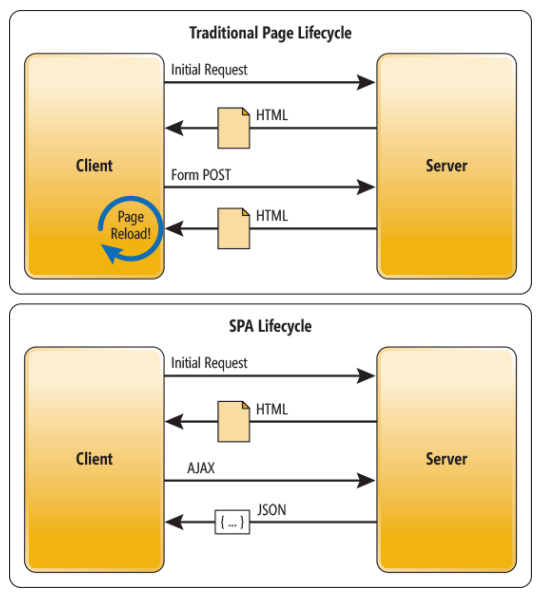

In [1]:
import requests
res = requests.get("http://example.webscraping.com/places/default/search")

In [2]:
from bs4 import BeautifulSoup
html = BeautifulSoup(res.content, 'lxml')
result = html.find("#results")
print(result) # 안나올걸

None


## Selenium
- python에만 있는 것이 아님
- 웹 브라우징을 자동화한 툴
- 일종의 매크로...?
- 대부분의 브라우저를 지원

In [2]:
from selenium import webdriver

In [3]:
driver = webdriver.Chrome("C://Development Tools/Web Driver/chromedriver")

In [4]:
driver.get("http://example.webscraping.com/places/default/search")

In [5]:
driver.find_element_by_id("search_term").send_keys("korea")

In [6]:
driver.find_element_by_id("search").click()

In [7]:
driver.implicitly_wait(1)

In [8]:
links = driver.find_elements_by_css_selector("#results a")

In [10]:
[link.text for link in links]

['North Korea', 'South Korea']

In [28]:
%%writefile account.json
{"id":"ghkdxofla",
"pw":"krtelbtit!#*92"}

Overwriting account.json


In [29]:
import json

In [30]:
with open("account.json", 'r') as f:
    account = json.load(f)

In [32]:
from selenium import webdriver

driver = webdriver.Chrome("C://Development Tools/Web Driver/chromedriver")

In [34]:
driver.get("https://www.naver.com")
driver.find_element_by_id("id").send_keys(account["id"])
driver.find_element_by_id("pw").send_keys(account["pw"])
driver.find_element_by_css_selector(".btn_login > input").click()

driver.get("https://mail.naver.com")

In [35]:
from bs4 import BeautifulSoup

In [38]:
html = BeautifulSoup(driver.page_source, 'lxml')

In [65]:
tempList = html.select(".subject strong")

In [66]:
for row in tempList:
    print(row.get_text())

메일 제목:[디시인사이드] 개인정보 이용 내역 안내
메일 제목:[네이버페이]주문하신 상품이 발송되었습니다
메일 제목:(광고)2018주택관리사 자격증취득 교육비100%전액 노동부국비지원 무료신청하세요.
메일 제목:[네이버페이]결제하신 내역을 안내해드립니다
메일 제목:[네이버페이]주문하신 상품이 발송되었습니다
메일 제목:[네이버페이]주문하신 상품이 발송되었습니다
메일 제목:SALE ON SALE!
메일 제목:[네이버페이]결제하신 내역을 안내해드립니다
메일 제목:(광고)취업유망 주택관리사 자격증취득 교육비 전액 노동부 국비지원 신청하세요. 이번달 한정~
메일 제목:연결된 Google 계정 관련 보안 경고
메일 제목:더 커진 할인 & 추가된 스타일 - 최대 60% 할인
메일 제목:연결된 Google 계정 관련 보안 경고
메일 제목:연결된 Google 계정 관련 보안 경고
메일 제목:연결된 Google 계정 관련 보안 경고
메일 제목:(제목없음)
메일 제목:롯데쇼핑(주) 시네마사업부문 분할에 따른 개인정보 이전 안내
메일 제목:FC2ID 회원 가입을 진심으로 환영합니다.
메일 제목:FC2ID　회원 등록용 메일
메일 제목:연결된 Google 계정 관련 보안 경고
메일 제목:Privacy Policy Update
메일 제목:(광고) 5월 다양한 이벤트 소개 체험단은 역시 피그미체험단
메일 제목:(광고)김정님님 참유원 대박이벤트 오늘마감됩니다.
메일 제목:[자소설닷컴] 개인정보취급방침 변경 안내
메일 제목:네이버 웹툰, 웹툰플러스에서 결제한 내역을 안내해 드립니다.
메일 제목:네이버 웹툰, 웹툰플러스에서 결제한 내역을 안내해 드립니다.
메일 제목:네이버 웹툰, 웹툰플러스에서 결제한 내역을 안내해 드립니다.
메일 제목:네이버 웹툰, 웹툰플러스에서 결제한 내역을 안내해 드립니다.
메일 제목:[네이트]회원님의 계정이 휴면 계정으로 전환될 예정입니다.
메일 제목:연결된 Google 계정 관련 보안 경고
메일 제목:연결된 Google 계정 관련 보안 경고
메일 제목:[네이버웹툰] 2

In [3]:
# 댓글달기

from selenium import webdriver
from bs4 import BeautifulSoup
import json

driver = webdriver.Chrome("C://Development Tools/Web Driver/chromedriver")

In [8]:
# 댓글달기

# 네이버 접속

with open("account.json", 'r') as f:
    account = json.load(f)
driver.get("https://www.naver.com")

# 로그인
try:
    driver.find_element_by_id("id").send_keys(account["id"])
    driver.find_element_by_id("pw").send_keys(account["pw"])
    driver.find_element_by_css_selector(".btn_login > input").click()
except Exception as e:
    print(e)

# 뉴스 페이지 접속
driver.get("https://news.naver.com")

# 이 시각 주요 뉴스 목록
html = BeautifulSoup(driver.page_source, 'lxml')
tempList = html.select(".newsnow_tx_inner a")
driver.implicitly_wait(1)

# 모든 페이지 접속 후 댓글을...
for row in tempList:
    # 뉴스 페이지 접속
    driver.get(row.attrs["href"])
    driver.implicitly_wait(1)
    
    # 페이지의 덧글란(정치 색션이면 네이버 뉴스 댓글을...)
    page = BeautifulSoup(driver.page_source, 'lxml')
    tempComment = page.select(".is_navercomment")
    if len(tempComment) != 0:
        driver.get(tempComment[0].attrs["href"])
    driver.implicitly_wait(1)
    # 댓글 입력만!
    driver.find_element_by_class_name("u_cbox_text").send_keys(input())



Message: no such element: Unable to locate element: {"method":"id","selector":"id"}
  (Session info: chrome=67.0.3396.99)
  (Driver info: chromedriver=2.40.565498 (ea082db3280dd6843ebfb08a625e3eb905c4f5ab),platform=Windows NT 10.0.17134 x86_64)

asdasd
asdasd
asdasd
dasjdioasdjio
sjiodjioasdj
dkdkdkdkd
import json



